In [3]:
!pip install findspark

In [4]:
import findspark
findspark.init()

In [7]:
## *Basic SQL Operations in Spark SQL*

# Contoh membuat DataFrame sederhana dan operasi dasar
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('MDLPertemuan9').getOrCreate()

data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [8]:
## 2. Advanced Queries for Data Analysis

spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [ ]:
## Tugas 2 Tambahan

In [9]:
# 1. cari rata rata gaji per departemen
print("rata-rata gaji karyawan per departemen")
spark.sql('''
SELECT DeptId, AVG(Salary) as AverageSalary FROM employees
GROUP BY DeptId ORDER BY DeptId''').show()

rata-rata gaji karyawan per departemen
+------+-------------+
|DeptId|AverageSalary|
+------+-------------+
|     1|       2850.0|
|     2|       4100.0|
+------+-------------+



In [10]:
# 2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
spark.sql('''
SELECT Name, Gender, Salary FROM employees
WHERE Salary >= (SELECT AVG(Salary) FROM employees
e WHERE e.Gender = employees.Gender)
''').show()




+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
| Anna|     F|  4100|
+-----+------+------+



In [11]:
# 3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.
print("Ranking karyawan berdasarkan gaji dalam departemen mereka")
spark.sql('''
SELECT DeptId, Name, Age, Salary, RANK() OVER (PARTITION BY Gender ORDER BY Salary DESC) as rank
FROM employees
''').show()

Ranking karyawan berdasarkan gaji dalam departemen mereka
+------+-----+---+------+----+
|DeptId| Name|Age|Salary|rank|
+------+-----+---+------+----+
|     2| Anna| 28|  4100|   1|
|     1|James| 34|  3000|   1|
|     1|  Lee| 23|  2700|   2|
+------+-----+---+------+----+



In [12]:
## 3. Penggunaan Window Functions dan Subqueries
print("Ranking karyawan berdasarkan gaji dalam departemen mereka")
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


Ranking karyawan berdasarkan gaji dalam departemen mereka
+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [13]:
## 4. Advanced Spark SQL Queries

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [ ]:
## Tugas 4 Tambahan

In [14]:
# 1) Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
# Rata-rata gaji per departemen
print("Rata-rata gaji per departemen")
average_salary_per_department = spark.sql('''
SELECT d.DeptName, AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')
average_salary_per_department.show()

# Ranking karyawan dalam departemen berdasarkan gaji
print("Ranking karyawan dalam departemen berdasarkan gaji")
ranking_in_department = spark.sql('''
SELECT e.Name, e.Age, d.DeptName, e.Salary,
       ROW_NUMBER() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS SalaryRank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, SalaryRank
''')
ranking_in_department.show()

Rata-rata gaji per departemen
+---------+---------+
| DeptName|AvgSalary|
+---------+---------+
|       HR|   2850.0|
|Marketing|   4100.0|
+---------+---------+

Ranking karyawan dalam departemen berdasarkan gaji
+-----+---+---------+------+----------+
| Name|Age| DeptName|Salary|SalaryRank|
+-----+---+---------+------+----------+
|James| 34|       HR|  3000|         1|
|  Lee| 23|       HR|  2700|         2|
| Anna| 28|Marketing|  4100|         1|
+-----+---+---------+------+----------+



In [15]:
# 2) Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.
print("menggunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.")
salary_trend_by_age = spark.sql('''
SELECT e.Name, e.Age, d.DeptName, e.Salary,
       AVG(e.Salary) OVER (PARTITION BY d.DeptName ORDER BY e.Age ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS SalaryTrendByAge
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
''')
salary_trend_by_age.show()


menggunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.
+-----+---+---------+------+----------------+
| Name|Age| DeptName|Salary|SalaryTrendByAge|
+-----+---+---------+------+----------------+
|  Lee| 23|       HR|  2700|          2700.0|
|James| 34|       HR|  3000|          2850.0|
| Anna| 28|Marketing|  4100|          4100.0|
+-----+---+---------+------+----------------+



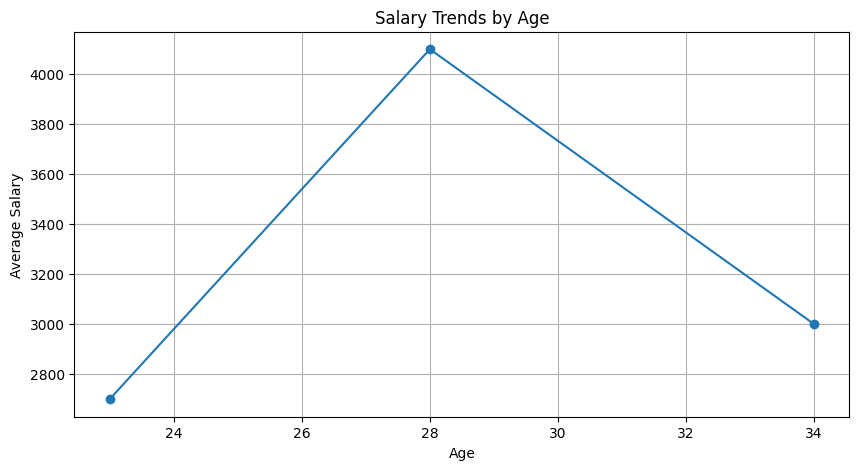

In [16]:
## 5. Advanced Data Analysis and Visualization

import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


In [ ]:
## 6. Homework

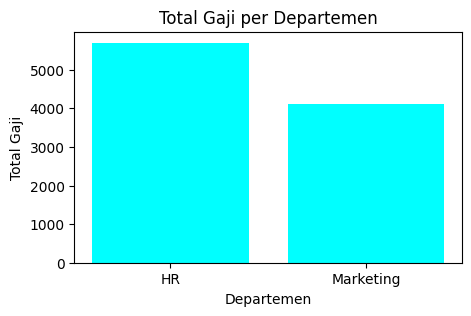

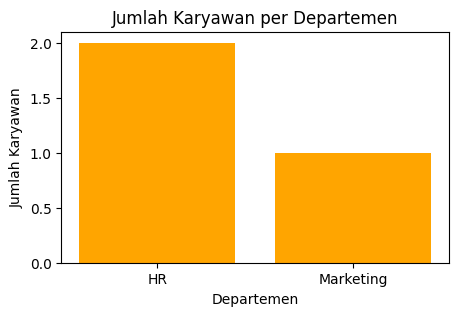

In [17]:
department_salary_count = spark.sql('''
SELECT d.DeptName AS Department,
       SUM(e.Salary) AS TotalSalary,
       COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY Department
''').toPandas()

# Plot perbandingan Total Salary per Department
plt.figure(figsize=(5, 3))
# Use the correct dataframe and column names
plt.bar(department_salary_count['Department'], department_salary_count['TotalSalary'], color='cyan')
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.show()

# Plot perbandingan Total Employees per Department
print("\n")
plt.figure(figsize=(5, 3))
# Use the correct dataframe and column names
plt.bar(department_salary_count['Department'], department_salary_count['EmployeeCount'], color='orange')
plt.title('Jumlah Karyawan per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Jumlah Karyawan')
plt.show()

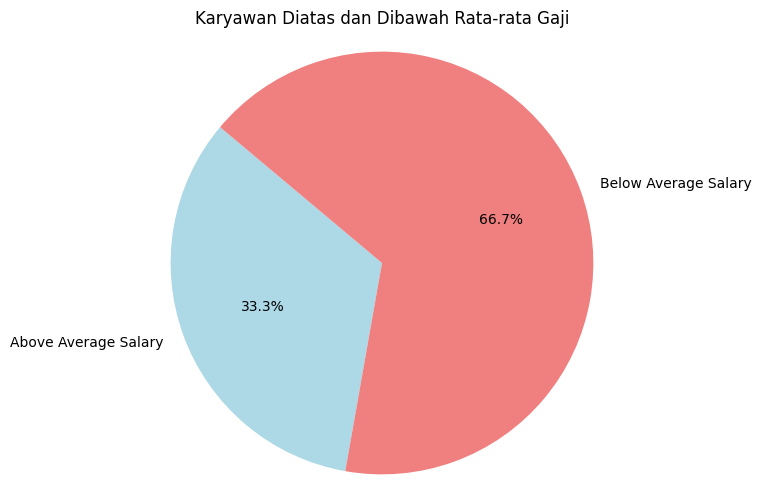

In [18]:
# Query SQL untuk mendapatkan jumlah karyawan diatas rata-rata
above_average_count = spark.sql('''
SELECT COUNT(*) AS AboveCount
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
''').collect()[0]['AboveCount']

# Query SQL untuk mendapatkan jumlah karyawan dibawah rata-rata
below_average_count = spark.sql('''
SELECT COUNT(*) AS BelowCount
FROM employees
WHERE Salary < (SELECT AVG(Salary) FROM employees)
''').collect()[0]['BelowCount']

# Menyiapkan data untuk pie chart
labels = ['Above Average Salary', 'Below Average Salary']
sizes = [above_average_count, below_average_count]
colors = ['lightblue', 'lightcoral']
explode = (0,0)

# membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # untuk pie chart agar berbentuk lingkaran
plt.title('Karyawan Diatas dan Dibawah Rata-rata Gaji')
plt.show()



In [20]:
from pyspark.sql import SparkSession
Spark = SparkSession.builder.appName('Analisis Salary(Pendapatan)').getOrCreate()

file_salary = "Data_Science_Jobs_Salaries.csv"
df_spark = spark.read.option("header", True).csv(file_salary, inferSchema=True)

# Menganalisis menggunakan AVG
df_spark.createOrReplaceTempView("Data_Science_Jobs_Salaries")
spark.sql('''
SELECT job_title, experience_level, AVG(salary) AS AverageSalary
FROM Data_Science_Jobs_Salaries
GROUP BY job_title, experience_level
ORDER BY experience_level
''').show()

+--------------------+----------------+------------------+
|           job_title|experience_level|     AverageSalary|
+--------------------+----------------+------------------+
|Machine Learning ...|              EN|103120.57142857143|
|        Data Analyst|              EN|          112875.0|
|Data Science Cons...|              EN|          139400.0|
|Computer Vision E...|              EN|          180000.0|
|Machine Learning ...|              EN|          225000.0|
|     BI Data Analyst|              EN|            9272.0|
|Business Data Ana...|              EN|           75000.0|
|        AI Scientist|              EN|          414750.0|
|      Data Scientist|              EN| 373492.3076923077|
|       Data Engineer|              EN|         1685500.0|
|         ML Engineer|              EN|           14000.0|
|   Big Data Engineer|              EN|          817500.0|
|  Research Scientist|              EN| 67333.33333333333|
|Computer Vision S...|              EN|           70000.

In [52]:
# Menganalisis menggunakan SQL Functions SUM()
total_salary = spark.sql('''
SELECT job_title,  SUM(Salary) as TotalSalary
FROM Data_Science_Jobs_Salaries
GROUP BY job_title
''').show()


+--------------------+-----------+
|           job_title|TotalSalary|
+--------------------+-----------+
|3D Computer Visio...|     400000|
|  Lead Data Engineer|     692000|
|     Data Specialist|     165000|
|Machine Learning ...|     722000|
|   Lead Data Analyst|    1707000|
|Data Engineering ...|     397000|
|Staff Data Scientist|     105000|
|Director of Data ...|     282500|
|Product Data Analyst|     450000|
|Principal Data Sc...|    1079000|
|        AI Scientist|    1714000|
|Director of Data ...|     743000|
|Machine Learning ...|    8765841|
| Lead Data Scientist|     305000|
|Machine Learning ...|     239000|
|Data Science Engi...|     193500|
|  Research Scientist|    1236900|
|        Head of Data|     465000|
| Cloud Data Engineer|     280000|
|      Data Scientist|   57298450|
+--------------------+-----------+
only showing top 20 rows



In [49]:
# Menganalisis menggunakan SQL Functions COUNT()
total_company = spark.sql('''
SELECT company_location, COUNT(*) AS TotalCompany
FROM Data_Science_Jobs_Salaries
GROUP BY company_location
ORDER BY TotalCompany DESC
''').show()


+----------------+------------+
|company_location|TotalCompany|
+----------------+------------+
|              US|         108|
|              DE|          19|
|              IN|          17|
|              GB|          16|
|              CA|          11|
|              FR|          11|
|              ES|           7|
|              JP|           4|
|              NL|           3|
|              PL|           3|
|              AT|           3|
|              TR|           3|
|              DK|           3|
|              MX|           2|
|              CN|           2|
|              RU|           2|
|              PT|           2|
|              PK|           2|
|              BR|           2|
|              GR|           2|
+----------------+------------+
only showing top 20 rows



+--------------------+-----------+----------------+------------+
|           job_title|TotalSalary|company_location|TotalCompany|
+--------------------+-----------+----------------+------------+
|3D Computer Visio...|     400000|              IN|          17|
|        AI Scientist|    1714000|              AS|           1|
|        AI Scientist|    1714000|              DK|           3|
|        AI Scientist|    1714000|              US|         108|
|        AI Scientist|    1714000|              ES|           7|
|Applied Data Scie...|      68000|              CA|          11|
|Applied Machine L...|     423000|              US|         108|
|     BI Data Analyst|   11357272|              US|         108|
|     BI Data Analyst|   11357272|              KE|           1|
|  Big Data Architect|     125000|              CA|          11|
|   Big Data Engineer|    3510000|              CH|           1|
|   Big Data Engineer|    3510000|              GB|          16|
|   Big Data Engineer|   

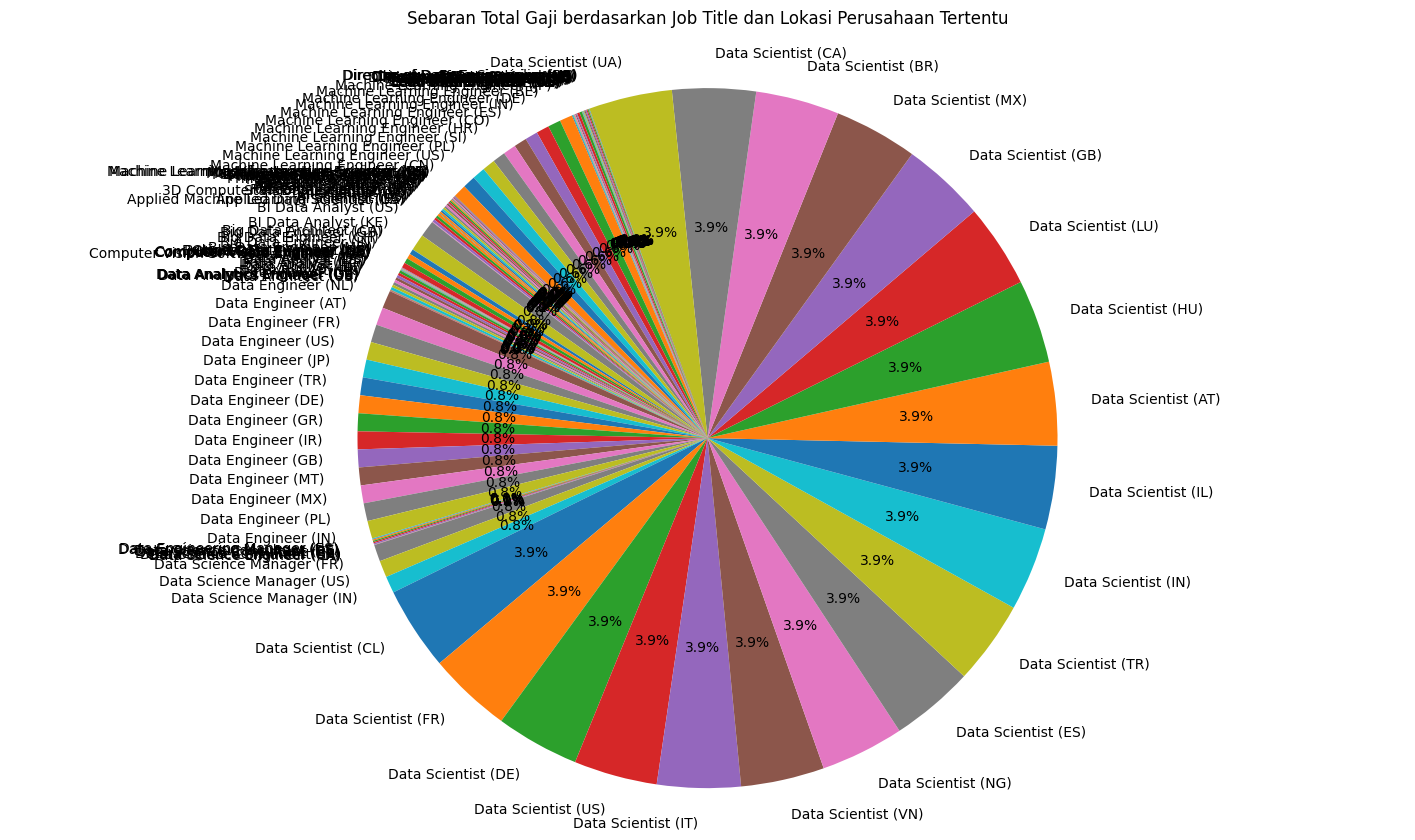

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Data menggunakan SQL Functions SUM()
total_salary = spark.sql('''
SELECT job_title, SUM(Salary) as TotalSalary
FROM Data_Science_Jobs_Salaries
GROUP BY job_title
''')
total_salary.createOrReplaceTempView("Total_Salary")

# Data menggunakan SQL Functions COUNT()
total_company = spark.sql('''
SELECT company_location, COUNT(*) AS TotalCompany
FROM Data_Science_Jobs_Salaries
GROUP BY company_location
ORDER BY TotalCompany DESC
''')
total_company.createOrReplaceTempView("Total_Company")


# Menggunakan SQL Functions JOIN(), antara data SUM dan COUNT
avg_salary_query = spark.sql('''
SELECT s.job_title, s.TotalSalary, c.company_location, c.TotalCompany
FROM Total_Salary s
JOIN Data_Science_Jobs_Salaries ds ON s.job_title = ds.job_title
JOIN Total_Company c ON ds.company_location = c.company_location
GROUP BY s.job_title, s.TotalSalary, c.company_location, c.TotalCompany
ORDER BY s.job_title
''')
avg_salary_query.show()


# Mengonversi hasil query ke Pandas DataFrame
avg_salary_pd = avg_salary_query.toPandas()

# Menambahkan label untuk pie chart
avg_salary_pd['label'] = avg_salary_pd['job_title'] + " (" + avg_salary_pd['company_location'] + ")"

# Membuat pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.pie(avg_salary_pd['TotalSalary'], labels=avg_salary_pd['label'], autopct='%1.1f%%', startangle=140)
plt.title('Sebaran Total Gaji berdasarkan Job Title dan Lokasi Perusahaan Tertentu\n')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()